In [7]:
import sys
sys.path.append('./utils')
from utils_imports import *

# train

In [ ]:
res = 10

In [ ]:
points = get_points("dump.sqlite", pd.Timestamp("2024-01-30"))
points["lon"] = points.geometry.x
points["lat"] = points.geometry.y

X = points[["lon", "lat"]].values
y = points["wait"].values
X.shape, y.shape

with open("models/kernel.pkl", "rb") as file:
    gpr = pickle.load(file)
    
print(gpr.regressor.optimizer)
gpr.regressor.optimizer = None
print(gpr.regressor.optimizer)

gpr = fit_gpr_silent(gpr, X, y)
raster_maker = raster_from_model(
    gpr,
    "world",
    res,
    show_uncertainties=True,
    verbose=True,
)

with open("jan.pkl", "wb") as file:
    pickle.dump(raster_maker, file)

((19031, 2), (19031,))

In [ ]:
points = get_points("dump.sqlite", pd.Timestamp("2024-03-30"))
points["lon"] = points.geometry.x
points["lat"] = points.geometry.y

X = points[["lon", "lat"]].values
y = points["wait"].values
X.shape, y.shape

with open("models/kernel.pkl", "rb") as file:
    gpr = pickle.load(file)
    
print(gpr.regressor.optimizer)
gpr.regressor.optimizer = None
print(gpr.regressor.optimizer)

gpr = fit_gpr_silent(gpr, X, y)
raster_maker = raster_from_model(
    gpr,
    "world",
    res,
    show_uncertainties=True,
    verbose=True,
)

with open("mar.pkl", "wb") as file:
    pickle.dump(raster_maker, file)

In [ ]:
points = get_points("dump.sqlite", pd.Timestamp("2024-05-30"))
points["lon"] = points.geometry.x
points["lat"] = points.geometry.y

X = points[["lon", "lat"]].values
y = points["wait"].values
X.shape, y.shape

with open("models/kernel.pkl", "rb") as file:
    gpr = pickle.load(file)
    
print(gpr.regressor.optimizer)
gpr.regressor.optimizer = None
print(gpr.regressor.optimizer)

gpr = fit_gpr_silent(gpr, X, y)
raster_maker = raster_from_model(
    gpr,
    "world",
    res,
    show_uncertainties=True,
    verbose=True,
)

with open("may.pkl", "wb") as file:
    pickle.dump(raster_maker, file)

In [ ]:
points = get_points("dump.sqlite", pd.Timestamp("2024-07-30"))
points["lon"] = points.geometry.x
points["lat"] = points.geometry.y

X = points[["lon", "lat"]].values
y = points["wait"].values
X.shape, y.shape

with open("models/kernel.pkl", "rb") as file:
    gpr = pickle.load(file)
    
print(gpr.regressor.optimizer)
gpr.regressor.optimizer = None
print(gpr.regressor.optimizer)

gpr = fit_gpr_silent(gpr, X, y)
raster_maker = raster_from_model(
    gpr,
    "world",
    res,
    show_uncertainties=True,
    verbose=True,
)

with open("jul.pkl", "wb") as file:
    pickle.dump(raster_maker, file)

In [ ]:
points = get_points("dump.sqlite", pd.Timestamp("2024-09-30"))
points["lon"] = points.geometry.x
points["lat"] = points.geometry.y

X = points[["lon", "lat"]].values
y = points["wait"].values
X.shape, y.shape

with open("models/kernel.pkl", "rb") as file:
    gpr = pickle.load(file)
    
print(gpr.regressor.optimizer)
gpr.regressor.optimizer = None
print(gpr.regressor.optimizer)

gpr = fit_gpr_silent(gpr, X, y)
raster_maker = raster_from_model(
    gpr,
    "world",
    res,
    show_uncertainties=True,
    verbose=True,
)

with open("sep.pkl", "wb") as file:
    pickle.dump(raster_maker, file)

In [ ]:
points = get_points("dump.sqlite", pd.Timestamp("2024-11-30"))
points["lon"] = points.geometry.x
points["lat"] = points.geometry.y

X = points[["lon", "lat"]].values
y = points["wait"].values
X.shape, y.shape

with open("models/kernel.pkl", "rb") as file:
    gpr = pickle.load(file)
    
print(gpr.regressor.optimizer)
gpr.regressor.optimizer = None
print(gpr.regressor.optimizer)

gpr = fit_gpr_silent(gpr, X, y)
raster_maker = raster_from_model(
    gpr,
    "world",
    res,
    show_uncertainties=True,
    verbose=True,
)

with open("nov.pkl", "wb") as file:
    pickle.dump(raster_maker, file)

In [ ]:
stop

# draw

In [363]:
map_path = raster_maker.get_raster_path()
map_path

'intermediate/map_TransformedTargetRegressorWithUncertainty_world_1.tif'

In [364]:
countries = gpd.read_file(
    "map_features/countries/ne_110m_admin_0_countries.shp"
)
countries = countries.to_crs(epsg=3857)
countries = countries[countries.NAME != "Antarctica"]
country_shapes = countries.geometry
country_shapes = country_shapes.apply(lambda x: make_valid(x))

In [365]:
nodata = np.nan
with rasterio.open(map_path) as heatmap:
    start = time.time()
    max_map_wait = heatmap.read().max()
    min_map_wait = heatmap.read().min()
    if raster_maker.verbose:
        print("max map waiting time:", max_map_wait)
    if raster_maker.verbose:
        print("min map waiting time:", min_map_wait)

    out_image, out_transform = rasterio.mask.mask(
        heatmap, country_shapes, nodata=nodata
    )
    out_meta = heatmap.meta
    print(f"Time elapsed to transform heatmap: {time.time() - start}")

out_meta.update(
    {
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform,
    }
)

new_map_path = f"intermediate/map_{raster_maker.method}_{raster_maker.region}_{raster_maker.resolution}_processed.tif"
with rasterio.open(new_map_path, "w", **out_meta) as destination:
    destination.write(out_image)

raster = rasterio.open(new_map_path)

max map waiting time: 359.7774545091566
min map waiting time: 1.2772924946865343
Time elapsed to transform heatmap: 0.056611061096191406


In [366]:
Z = raster.read()[0]
Z.shape

(136, 360)

In [367]:
import xyzservices.providers as xyz
import folium
lon, lat = 12, 48.875
zoom_start = 2


tiles = xyz.CartoDB.Positron
m = folium.Map(
    tiles=folium.TileLayer(no_wrap=True, tiles=tiles),
    attr="Dummy",
    zoom_start=zoom_start,
    location=[lat, lon],
)

In [368]:
BUCKETS = [
    "#008200",  # dark green
    "#00c800",  # light green
    "#c8ff00",  # light yellow
    "#ffff00",  # yellow
    "#ffc800",  # light orange
    "#ff8200",  # dark orange
    "red",  # red
    "#c80000",  # dark red
    "#820000",  # wine red
    "#330100",  # drop?
]

# define the heatmap color scale
# values higher than the upper boundary are colored in the upmost color
BOUNDARIES = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

import matplotlib.colors as colors
cmap = colors.ListedColormap(BUCKETS)

norm = colors.BoundaryNorm(BOUNDARIES, cmap.N, clip=True)
cmap.set_bad(color="#000000", alpha=0.0) # opaque for NaN values (sea)

In [369]:
image = norm(Z).data
image.shape, np.unique(image, return_counts=True)

((136, 360),
 (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int16),
  array([  251,  4382,  9815,  1039,   418,   226,   113,    35,    30,
            58, 32593])))

In [370]:
uncertainties = raster_maker.raw_uncertainties
uncertainties.shape

(136, 360)

In [371]:
discrete_uncertainties = False
uncertainties = np.where(
    np.isnan(raster.read()[0]), uncertainties.min(), uncertainties
)
if (uncertainties.max() - uncertainties.min()) != 0:
    uncertainties = (uncertainties - uncertainties.min()) / (
        uncertainties.max() - uncertainties.min()
    )
    uncertainties = 1 - uncertainties
    if discrete_uncertainties:
        # threshold for uncertainty decided by experiment
        uncertainties = np.where(uncertainties < 0.25, 0.0, 1.0)
else:
    uncertainties = 1.0
# let uncertainty be high in the sea
uncertainties = np.where(np.isnan(raster.read()[0]), 0.0, uncertainties)
uncertainties = uncertainties.astype(
    np.float64
)  # matplotlib cannot handle float128
raster_maker.uncertainties = uncertainties

In [372]:
import numpy as np
import matplotlib.pyplot as plt

# Input 2D scalar array
scalars = image
opacities = uncertainties

# Apply the colormap to scalars
colors = cmap(scalars)

# Combine RGB values with the opacity
rgba_array = np.empty_like(colors)
rgba_array[:, :, :3] = colors[:, :, :3]  # RGB
rgba_array[:, :, 3] = opacities  # A

# Verify shape and content
print(rgba_array.shape)

(136, 360, 4)


In [373]:
np.unique(scalars, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int16),
 array([  251,  4382,  9815,  1039,   418,   226,   113,    35,    30,
           58, 32593]))

In [374]:
cmap(10)

(0.2, 0.00392156862745098, 0.0, 1.0)

In [375]:
folium.raster_layers.ImageOverlay(
    image=rgba_array,
    bounds=[[-56, -180], [80, 180]],
).add_to(m)

/home/till/.local/lib/python3.10/site-packages/branca/utilities.py:329: RuntimeWarning: invalid value encountered in divide
  array = array * 255./array.max(axis=(0, 1)).reshape((1, 1, 4))
/home/till/.local/lib/python3.10/site-packages/branca/utilities.py:330: RuntimeWarning: invalid value encountered in cast
  array = array.astype('uint8')



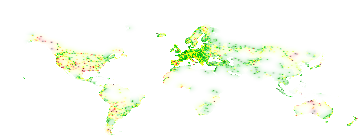

In [376]:
m